training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG
training MLP


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

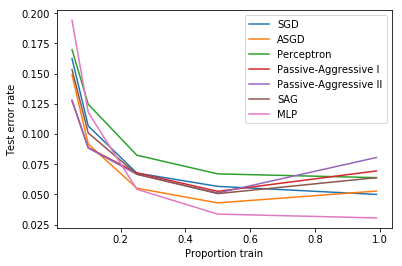

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

heldout = [0.95, 0.90, 0.75, 0.50, 0.01] # Porsi-porsi testing datanya. Proporsi pertama 95% testing 5% training,
# Proporsi kedua 90% testing 10% training, begitu seterusnya sampai proporsi kelima. Intinya pengen cari tahu error rate
# pada proporsi tertentu.
rounds = 20 # Dua puluh kali diulang, nanti dirata-rata
digits = datasets.load_digits() # data tulisan tangan tentang angka
x, y = digits.data, digits.target

# Kita nggak menentukan epochnya untuk perceptron di sini.

# Ingin mengukur performa perceptron dibandingkan dengan classifier lain.

classifiers = [
    ("SGD", SGDClassifier(max_iter = 100, tol = 1e-3)),
    ("ASGD", SGDClassifier(average = True, max_iter = 1000, tol = 1e-3)),
    ("Perceptron", Perceptron(tol = 1e-3)), # Kita tidak define max_iter, by default 1000 kali epochnya.
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss = 'hinge', C = 1.0, tol = 1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss = 'squared_hinge', C = 1.0, tol = 1e-4)),
    ("SAG", LogisticRegression(solver = 'sag', tol = 1e-1, C = 1.e4 / x.shape[0], multi_class = 'auto')),
    ("MLP", MLPClassifier(tol = 1e-4)),
#     ("MLP, constant with Nesterov's momentum", MLPClassifier(solver = 'sgd', learning_rate = 'constant', momentum = 0.9,
#                                                              nesterovs_momentum = True, learning_rate_init = 0.2))
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = i, random_state = rng)
            clf.fit(x_train, y_train) # Proses training. Di sini inisiasi weight nggak kelihatan, udah di dalam librarynya.
                                      # Nggak kelihatan juga errornya berapa.
            y_pred = clf.predict(x_test)
            yy_.append(1 - np.mean(y_pred == y_test)) # setelah diulang, dirata-rata
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label = name)
    
plt.legend(loc = "upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test error rate")
plt.show()


Compare Stochastic learning strategies for MLPClassifier
This example visualizes some training loss curves for different stochastic
learning strategies, including SGD and Adam. Because of time-constraints, we
use several small datasets, for which L-BFGS might be more suitable. The
general trend shown in these examples seems to carry over to larger datasets,
however.
Note that those results can be highly dependent on the value of
``learning_rate_init``.


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
T

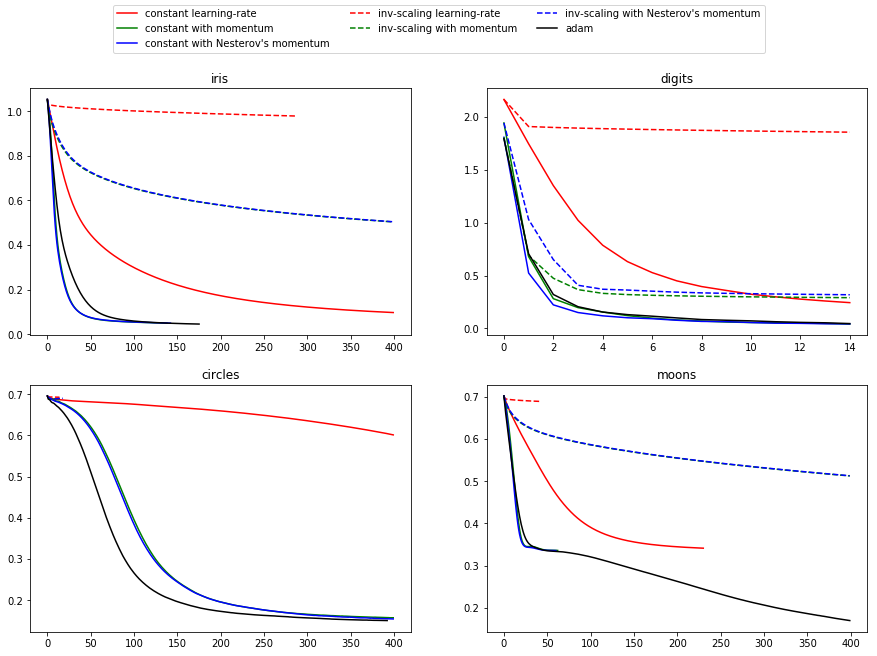

In [4]:
"""
========================================================
Compare Stochastic learning strategies for MLPClassifier
========================================================
This example visualizes some training loss curves for different stochastic
learning strategies, including SGD and Adam. Because of time-constraints, we
use several small datasets, for which L-BFGS might be more suitable. The
general trend shown in these examples seems to carry over to larger datasets,
however.
Note that those results can be highly dependent on the value of
``learning_rate_init``.
"""

print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

# solver itu metode trainingnya
# learning rate bisa constant, inverse scaling, bisa adaptif
# momentum khusus punya sgd
# learning init sementara disamakan

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [(iris.data, iris.target),
             (X_digits, y_digits),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

# empat datasets yang digunakan: iris, digits, make_circles, make_moons.

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

# garis lurus untuk learning rate konstan
# garis putus putus untuk learning rate inverse scaling (makin kecil)
# constant learning rate dengan momentum Nesterov paling bagus di sini
# inverse scaling dengan momentum Nesterov lebih buruk
# pokoknya error paling kecil paling bagus
# coba banyak parameter
# karakteristik dataset berbeda-beda